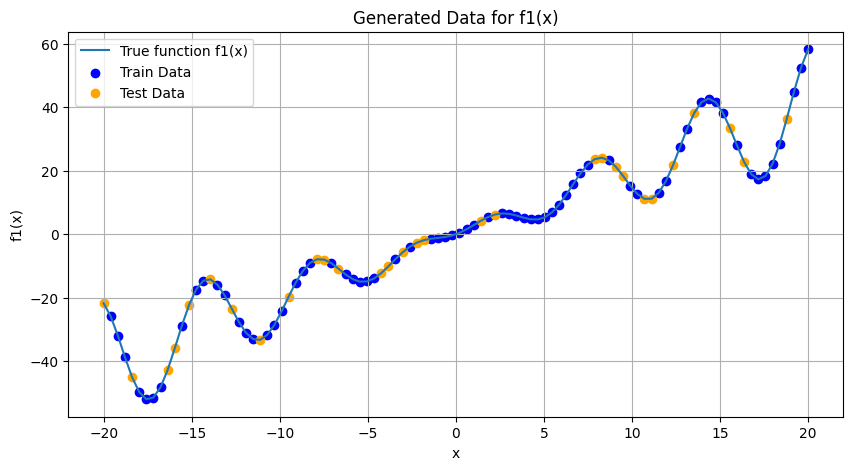

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Function f1(x) = x·sin(x) + 2x
def f1(x):
    return x * np.sin(x) + 2 * x

# Dataset parameters
tr = 20
n_samples = 100

# Generate data
X = np.linspace(-tr, tr, n_samples)
y = f1(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42, shuffle=True
)

# Sorting for visualization
X_test_sorted = np.sort(X_test)
y_test_sorted = y_test[np.argsort(X_test)]

# Plot the function
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='True function f1(x)')
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.legend()
plt.title("Generated Data for f1(x)")
plt.xlabel("x")
plt.ylabel("f1(x)")
plt.grid(True)
plt.show()



Linear Regression
MSE: 57.420302682000056
R2 Score: 0.891991685511165


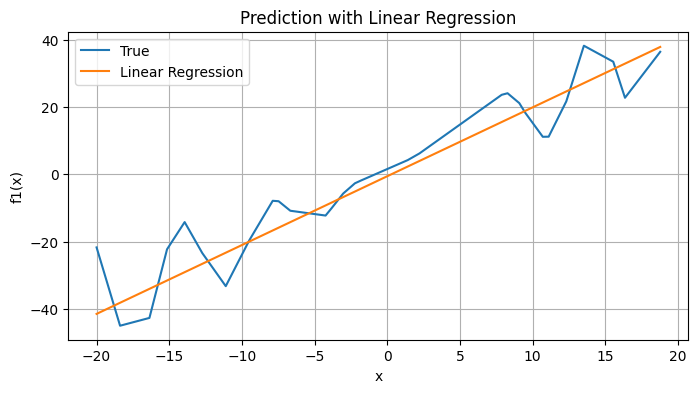


Ridge Regression
MSE: 57.41105707111783
R2 Score: 0.8920090766219946


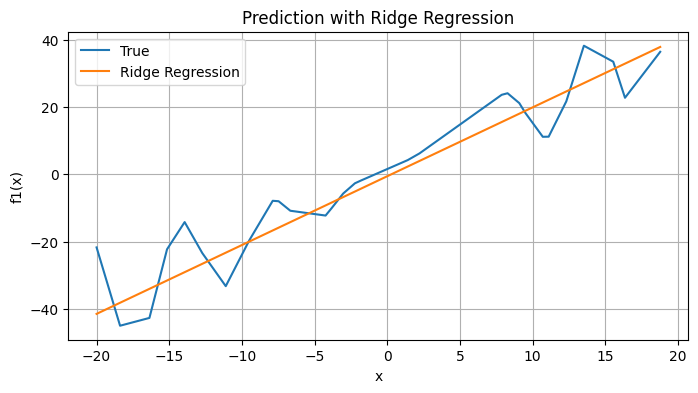


Support Vector Regressor
MSE: 152.28859631120469
R2 Score: 0.7135432271310538


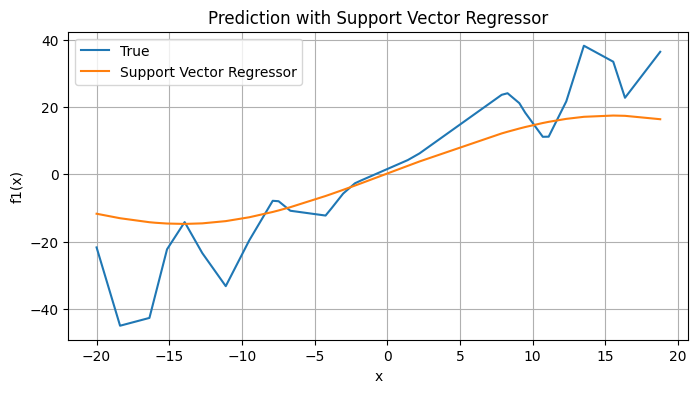


Random Forest
MSE: 7.00976166923506
R2 Score: 0.9868145497759653


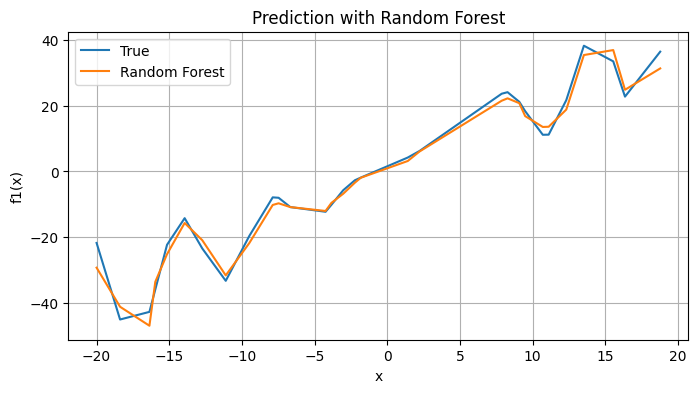

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



MLP Regressor
MSE: 57.4588768357594
R2 Score: 0.8919191270408021


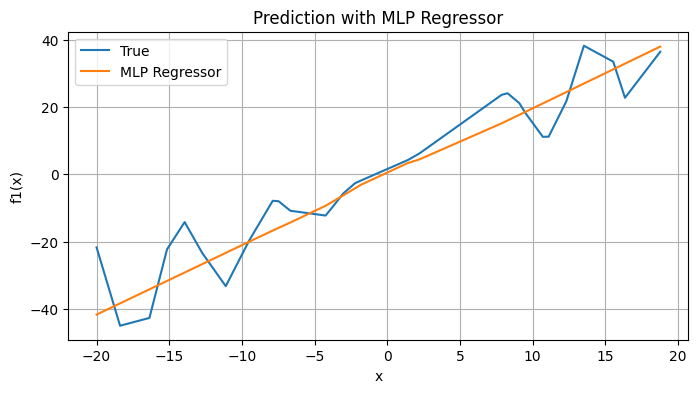

In [2]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare X in 2D shape for sklearn
X_train_2D = X_train.reshape(-1, 1)
X_test_sorted_2D = X_test_sorted.reshape(-1, 1)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_2D, y_train)
    y_pred = model.predict(X_test_sorted_2D)
    print(f"\n{name}")
    print("MSE:", mean_squared_error(y_test_sorted, y_pred))
    print("R2 Score:", r2_score(y_test_sorted, y_pred))

    plt.figure(figsize=(8, 4))
    plt.plot(X_test_sorted, y_test_sorted, label="True")
    plt.plot(X_test_sorted, y_pred, label=name)
    plt.legend()
    plt.title(f"Prediction with {name}")
    plt.xlabel("x")
    plt.ylabel("f1(x)")
    plt.grid(True)
    plt.show()


Enhanced Feature Model:
MSE: 6.319425661392535e-06
R2 Score: 0.9999999881130806


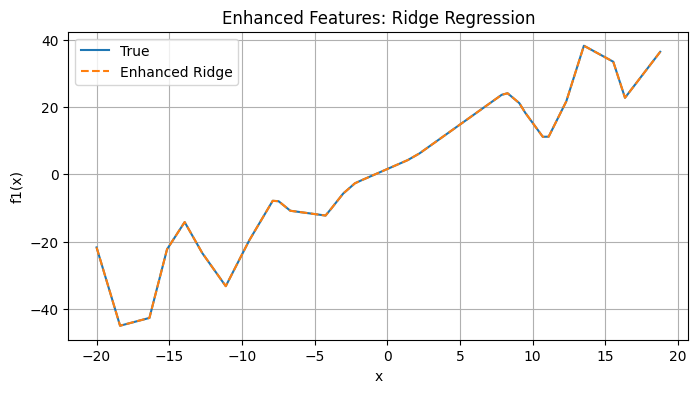

In [3]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Build enhanced feature set: x, x², sin(x), cos(x)
def enhanced_features(x):
    return np.column_stack([
        x,                          # x
        x**2,                       # x²
        np.sin(x),                  # sin(x)
        np.cos(x),                  # cos(x)
        x * np.sin(x)               # x*sin(x) (actual term from f1)
    ])

# Wrap in pipeline with Ridge Regression
model_enhanced = make_pipeline(
    FunctionTransformer(enhanced_features),
    Ridge(alpha=1.0)
)

# Fit on training data
model_enhanced.fit(X_train_2D, y_train)

# Predict on test data
y_pred_enhanced = model_enhanced.predict(X_test_sorted_2D)

# Evaluate
print("Enhanced Feature Model:")
print("MSE:", mean_squared_error(y_test_sorted, y_pred_enhanced))
print("R2 Score:", r2_score(y_test_sorted, y_pred_enhanced))

# Plot
plt.figure(figsize=(8, 4))
plt.plot(X_test_sorted, y_test_sorted, label="True")
plt.plot(X_test_sorted, y_pred_enhanced, label="Enhanced Ridge", linestyle='--')
plt.legend()
plt.title("Enhanced Features: Ridge Regression")
plt.xlabel("x")
plt.ylabel("f1(x)")
plt.grid(True)
plt.show()


In [5]:
# Function to inject Gaussian noise
def inject_noise(y):
    return y + np.random.normal(0, 50, size=y.size)

# Add noise to original y
y_noisy = inject_noise(f1(X))

# Split noisy data
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(
    X, y_noisy, train_size=0.7, random_state=42, shuffle=True
)

X_test_n_sorted = np.sort(X_test_n)
y_test_n_sorted = y_test_n[np.argsort(X_test_n)]

X_train_n_2D = X_train_n.reshape(-1, 1)
X_test_n_sorted_2D = X_test_n_sorted.reshape(-1, 1)


📊 Performance of Models on Noisy Data:


Linear Regression
MSE: 3214.745334261263
R2 Score: -0.21329136431143692


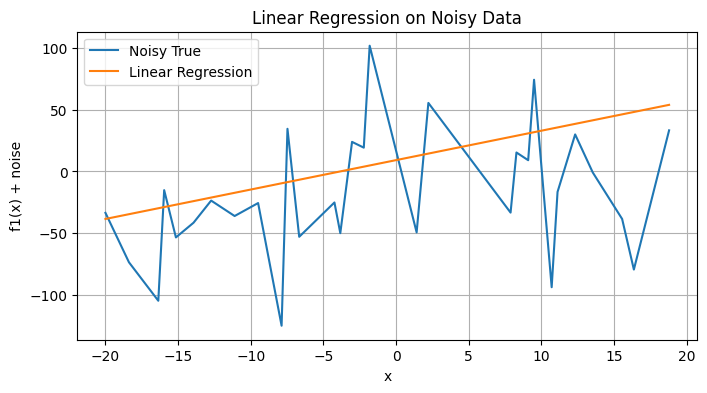


Ridge Regression
MSE: 3214.696912361877
R2 Score: -0.21327308918657928


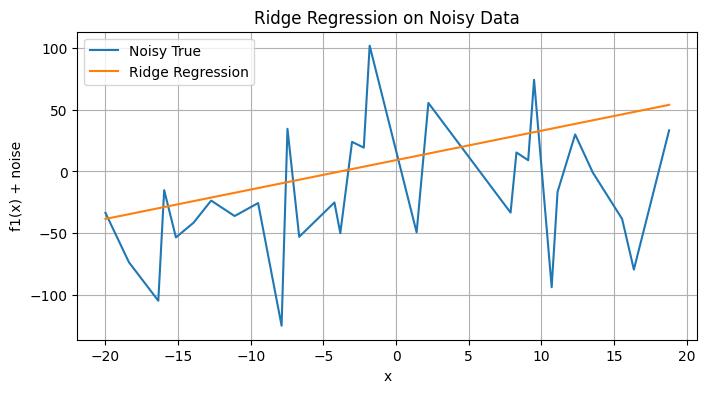


Support Vector Regressor
MSE: 3459.61940973251
R2 Score: -0.30571038050740684


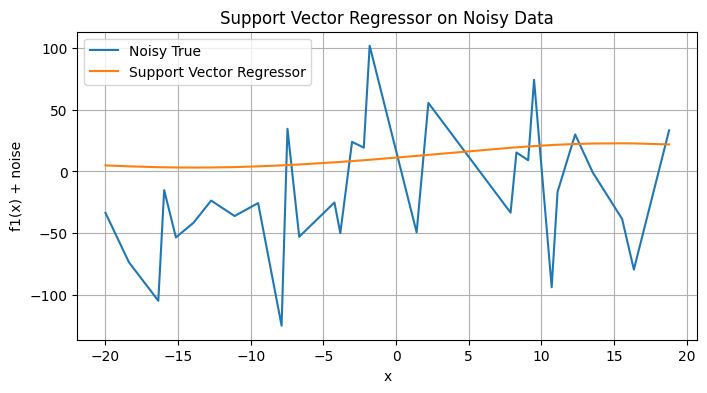


Random Forest
MSE: 3664.212513031385
R2 Score: -0.38292677546867226


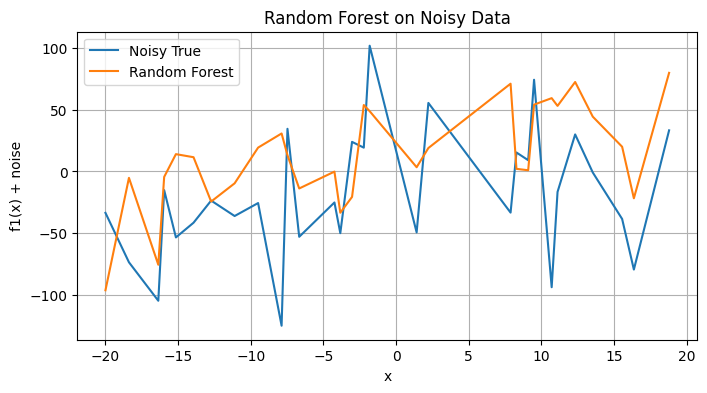


MLP Regressor
MSE: 3145.890241880155
R2 Score: -0.18730445701756193


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


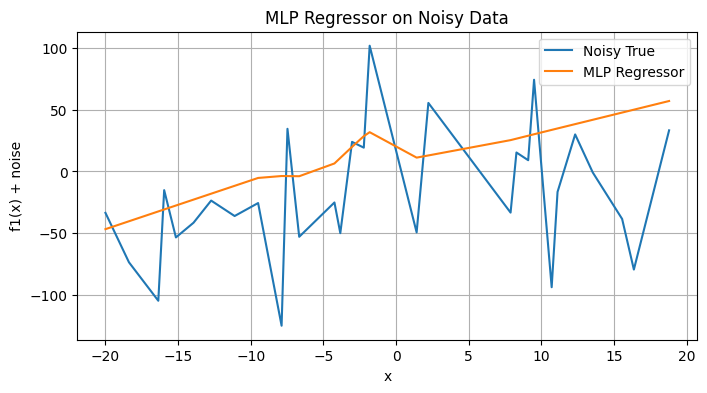

In [6]:
print("📊 Performance of Models on Noisy Data:\n")

for name, model in models.items():
    model.fit(X_train_n_2D, y_train_n)
    y_pred_n = model.predict(X_test_n_sorted_2D)

    print(f"\n{name}")
    print("MSE:", mean_squared_error(y_test_n_sorted, y_pred_n))
    print("R2 Score:", r2_score(y_test_n_sorted, y_pred_n))

    plt.figure(figsize=(8, 4))
    plt.plot(X_test_n_sorted, y_test_n_sorted, label="Noisy True")
    plt.plot(X_test_n_sorted, y_pred_n, label=name)
    plt.legend()
    plt.title(f"{name} on Noisy Data")
    plt.xlabel("x")
    plt.ylabel("f1(x) + noise")
    plt.grid(True)
    plt.show()


In [7]:
from sklearn.datasets import make_regression

# Generate synthetic dataset with 2000 samples, 10 features
X_multi, y_multi = make_regression(
    n_samples=2000,
    n_features=10,
    n_informative=5,     # Only 5 of them actually affect the target
    noise=10.0,          # Add some noise
    random_state=42
)

# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, train_size=0.7, random_state=42
)


In [8]:
print("📊 Multivariate Regression Performance:\n")

for name, model in models.items():
    model.fit(X_train_m, y_train_m)
    y_pred_m = model.predict(X_test_m)

    print(f"\n{name}")
    print("MSE:", mean_squared_error(y_test_m, y_pred_m))
    print("R2 Score:", r2_score(y_test_m, y_pred_m))


📊 Multivariate Regression Performance:


Linear Regression
MSE: 103.75647941019041
R2 Score: 0.9962124540353298

Ridge Regression
MSE: 103.74339721820691
R2 Score: 0.996212931590117

Support Vector Regressor
MSE: 18053.820568517076
R2 Score: 0.340959951321826

Random Forest
MSE: 1990.1582618926939
R2 Score: 0.9273508899228655

MLP Regressor
MSE: 150.00446798173553
R2 Score: 0.9945242087952829


In [11]:
import os
import zipfile
import pandas as pd
import urllib.request

# Create data folder
os.makedirs("data", exist_ok=True)

# URL to the ZIP file
url = "https://github.com/dbdmg/data-science-lab/raw/master/datasets/weatherww2.zip"
zip_path = "data/weatherww2.zip"

# Download the ZIP file
urllib.request.urlretrieve(url, zip_path)

# Extract ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("data/weatherww2")

# Load SummaryofWeather.csv
df = pd.read_csv("/content/data/weatherww2/weatherww2/SummaryofWeather.csv")

# Show basic info
print("Data loaded. First 5 rows:")
display(df.head())
print("\nData shape:", df.shape)


Data loaded. First 5 rows:


<ipython-input-11-c6458a76c612>:21: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data/weatherww2/weatherww2/SummaryofWeather.csv")


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Data shape: (119040, 31)


In [13]:
# Filter for sensor ID 22508 (Honolulu)
df_honolulu = df[df["STA"] == 22508].copy()

# Convert 'Date' to datetime format
df_honolulu["Date"] = pd.to_datetime(df_honolulu["Date"], errors='coerce')

# Drop rows with missing dates or missing MeanTemp
df_honolulu = df_honolulu.dropna(subset=["Date", "MeanTemp"])

# Sort by date
df_honolulu.sort_values("Date", inplace=True)

# Show filtered dataset
print("Filtered data for STA 22508 (Honolulu):")
display(df_honolulu.head())
print("\nDate range:", df_honolulu["Date"].min(), "to", df_honolulu["Date"].max())


Filtered data for STA 22508 (Honolulu):


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
57877,22508,1940-01-01,0.254,NaN,23.333333,17.222222,20.000000,0,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57878,22508,1940-01-02,10.16,NaN,23.333333,16.111111,19.444444,0,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57879,22508,1940-01-03,T,NaN,23.888889,15.555556,20.000000,0,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57880,22508,1940-01-04,2.286,NaN,23.888889,18.333333,21.111111,0,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57881,22508,1940-01-05,0.254,NaN,22.222222,15.000000,18.333333,0,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Date range: 1940-01-01 00:00:00 to 1945-12-31 00:00:00


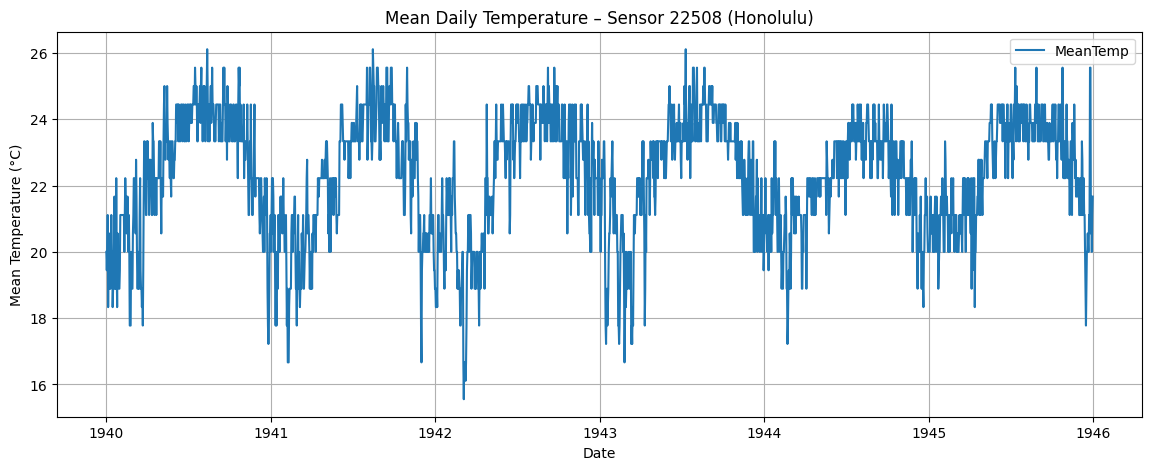

In [14]:
import matplotlib.pyplot as plt

# Plot the MeanTemp time series
plt.figure(figsize=(14, 5))
plt.plot(df_honolulu["Date"], df_honolulu["MeanTemp"], label="MeanTemp")
plt.title("Mean Daily Temperature – Sensor 22508 (Honolulu)")
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()


In [15]:
import numpy as np

# Use only the MeanTemp series
temps = df_honolulu["MeanTemp"].values

# Define window size (e.g., 7 for a week)
W = 7

# Create rolling window dataset
X_roll = []
y_roll = []

for i in range(len(temps) - W):
    X_roll.append(temps[i:i+W])       # W inputs
    y_roll.append(temps[i+W])         # next day

X_roll = np.array(X_roll)
y_roll = np.array(y_roll)

print(f"Created rolling window dataset with window size {W}")
print(" Input shape:", X_roll.shape)
print("Target shape:", y_roll.shape)


Created rolling window dataset with window size 7
 Input shape: (2185, 7)
Target shape: (2185,)


In [17]:
# Adjust dates to match X_roll and y_roll
dates = df_honolulu["Date"].values[W:]

# Split based on year
train_mask = pd.to_datetime(dates).year < 1945
test_mask = pd.to_datetime(dates).year == 1945

X_train_t, X_test_t = X_roll[train_mask], X_roll[test_mask]
y_train_t, y_test_t = y_roll[train_mask], y_roll[test_mask]
dates_test = dates[test_mask]

print("Train samples:", len(y_train_t))
print("Test samples (year 1945):", len(y_test_t))


Train samples: 1820
Test samples (year 1945): 365



 Linear Regression
 MSE: 0.7357097600502952
R² Score: 0.6873754617916643


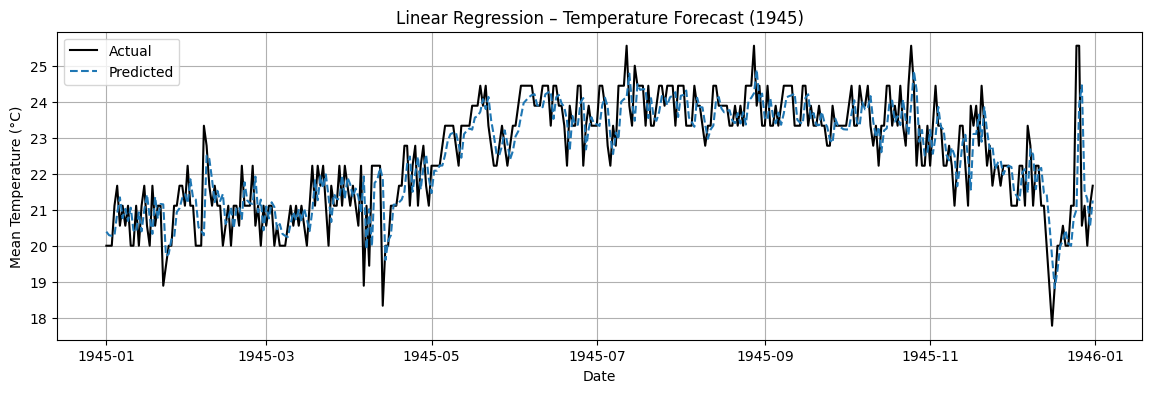


 Random Forest
 MSE: 0.8261361539045385
R² Score: 0.6489506492424936


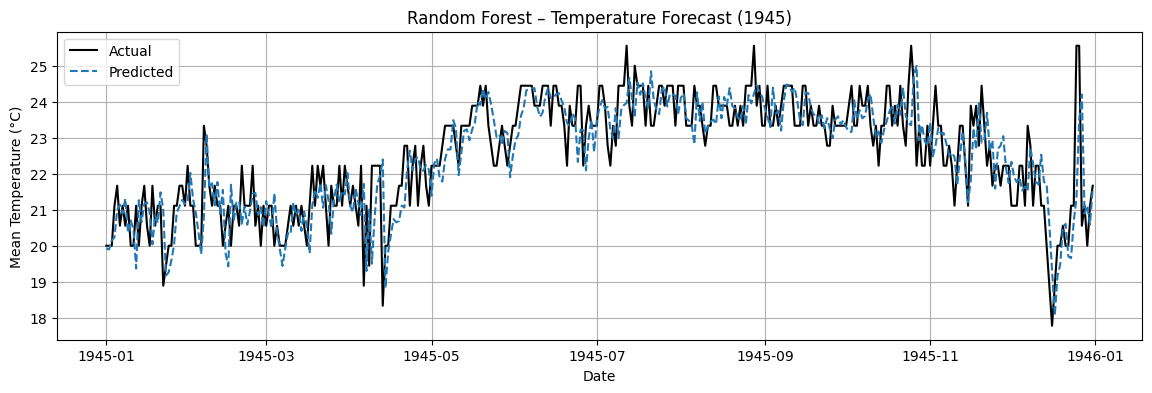


 MLP Regressor
 MSE: 0.761728622073497
R² Score: 0.6763192883297902


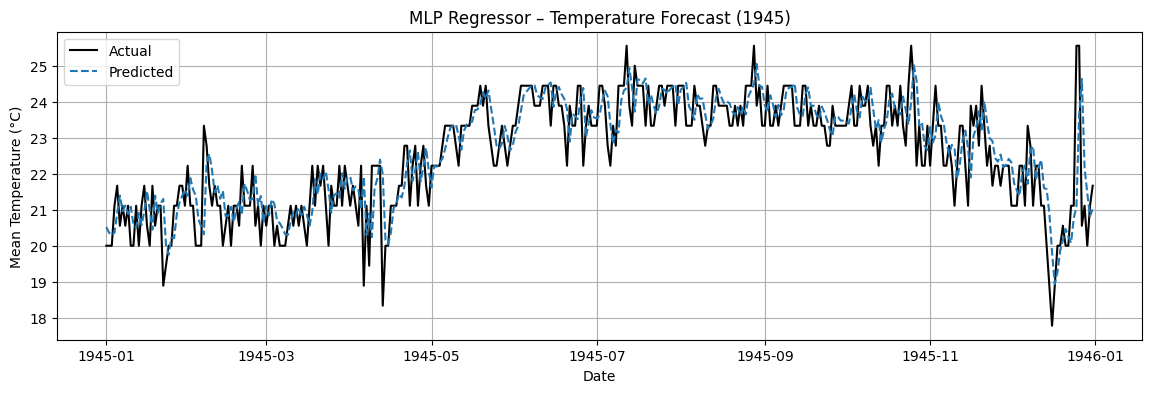

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define models
models_time = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Train and evaluate
for name, model in models_time.items():
    model.fit(X_train_t, y_train_t)
    y_pred = model.predict(X_test_t)

    print(f"\n {name}")
    print(" MSE:", mean_squared_error(y_test_t, y_pred))
    print("R² Score:", r2_score(y_test_t, y_pred))

    # Plot true vs predicted temperatures
    plt.figure(figsize=(14, 4))
    plt.plot(dates_test, y_test_t, label="Actual", color="black")
    plt.plot(dates_test, y_pred, label="Predicted", linestyle="--")
    plt.title(f"{name} – Temperature Forecast (1945)")
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature (°C)")
    plt.legend()
    plt.grid(True)
    plt.show()


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

window_sizes = [3, 5, 7, 14, 30]
results = []

for W in window_sizes:
    # Recreate rolling window dataset
    X_temp = []
    y_temp = []
    for i in range(len(temps) - W):
        X_temp.append(temps[i:i+W])
        y_temp.append(temps[i+W])

    X_temp = np.array(X_temp)
    y_temp = np.array(y_temp)
    dates_temp = df_honolulu["Date"].values[W:]

    # Time-based split: 1940–1944 for training, 1945 for testing
    train_mask = pd.to_datetime(dates_temp).year < 1945
    test_mask = pd.to_datetime(dates_temp).year == 1945

    X_train, X_test = X_temp[train_mask], X_temp[test_mask]
    y_train, y_test = y_temp[train_mask], y_temp[test_mask]
    dates_test = dates_temp[test_mask]

    # Train Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append((W, mse, r2))

    print(f"\n Window Size = {W}")
    print("MSE:", mse)
    print("R² Score:", r2)

# Show results in a table
df_results = pd.DataFrame(results, columns=["Window Size", "MSE", "R² Score"])
print("\n Rolling Window Performance Summary:")
print(df_results)



 Window Size = 3
MSE: 0.8249918925076416
R² Score: 0.6494368792889321

 Window Size = 5
MSE: 0.9326504043525614
R² Score: 0.603689637132713

 Window Size = 7
MSE: 0.8261361539045385
R² Score: 0.6489506492424936

 Window Size = 14
MSE: 0.7676797729029936
R² Score: 0.6737904707431479

 Window Size = 30
MSE: 0.7039386094461989
R² Score: 0.7008759504698001

 Rolling Window Performance Summary:
   Window Size       MSE  R² Score
0            3  0.824992  0.649437
1            5  0.932650  0.603690
2            7  0.826136  0.648951
3           14  0.767680  0.673790
4           30  0.703939  0.700876
